In [1]:
import os
import pathlib


path=os.path.join(str(pathlib.Path().resolve()))+"/"

In [ ]:
#!conda install -y conda-forge::librosa
#!conda install -y conda-forge::libsndfile

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample, random, randint

import librosa
import librosa.display


In [35]:
import soundfile
# Si falla reinstalar soundfile

f_ejemplo = path + "audio1.wav"
samples, sample_rate = librosa.load(f_ejemplo, sr=None, mono=False)
samples.sha

(2, 238533)

In [12]:
print(f"Shape: {samples.shape} Sr: {sample_rate}")

Shape: (2, 238533) Sr: 48000


In [13]:
from IPython.display import Audio
Audio(f_ejemplo)

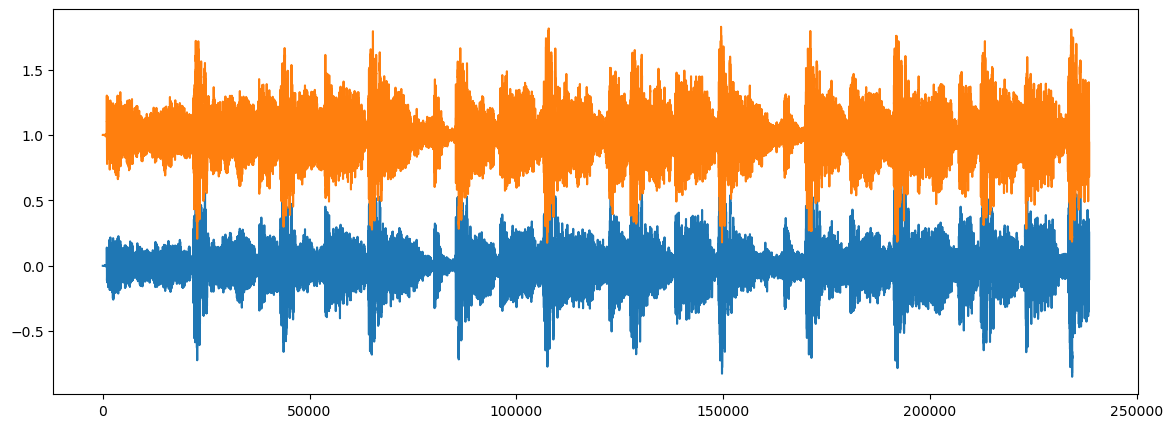

In [15]:
plt.figure(figsize=(14,5))
plt.plot(samples[0, :] )
plt.plot(samples[1, :] + 1)

In [16]:
# transformar a mono
samples_mono = librosa.to_mono(samples)
print(samples_mono.shape)

(238533,)


In [18]:
# adaptar sample rate para voz
sr = 22050
sample_resamp = librosa.resample(samples_mono,orig_sr=sample_rate,target_sr=sr)
print(sample_resamp.shape)

(109577,)


In [21]:
# tamaño a 4s
max_ms = 4000
sig_len = sample_resamp.shape[0]
max_len = (sr//1000) * max_ms

if sig_len >= max_len: # truncar
  samples_trunc = sample_resamp[:max_len]
else: # expandir con ceros
  z = np.zeros(max_len - sig_len)
  samples_trunc = np.concatenate((samples_trunc,z))
print(samples_trunc.shape)

(88000,)


In [25]:
samples_trunc

array([ 2.7325283e-05, -9.3484137e-05, -5.1903236e-05, ...,
        9.5487855e-02,  1.5566859e-01,  2.6888573e-01], dtype=float32)

In [26]:
# si queremos añadir desplazamientos...
shift_limit = 0.1 # % a desplazar
sig_len = samples_trunc.shape[0]
shift_len = int(shift_limit * sig_len)
samples_shift = np.roll(samples_trunc, shift_len)

In [27]:
# meter ruido. ajustamos la relación Señal / ruido
SNR = 50
RMS_s = math.sqrt(np.mean(samples_shift**2)) # rms
RMS_n = math.sqrt(RMS_s**2/(pow(10, SNR/10))) # rms deseado del ruido
noise = np.random.normal(0, RMS_n, samples_shift.shape[0]) # normal media 0 y desviación std RMS_n
samples_noise = samples_shift + noise


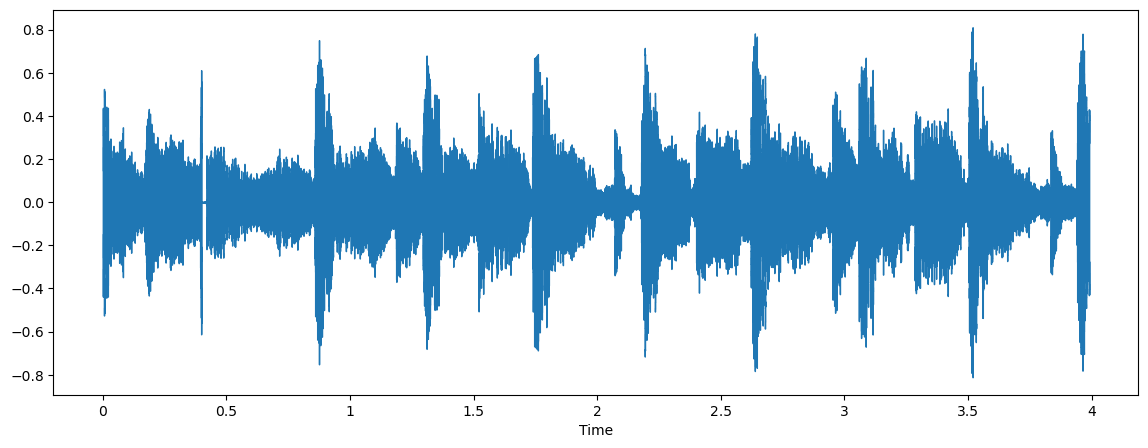

In [28]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(samples_noise, sr=sr)

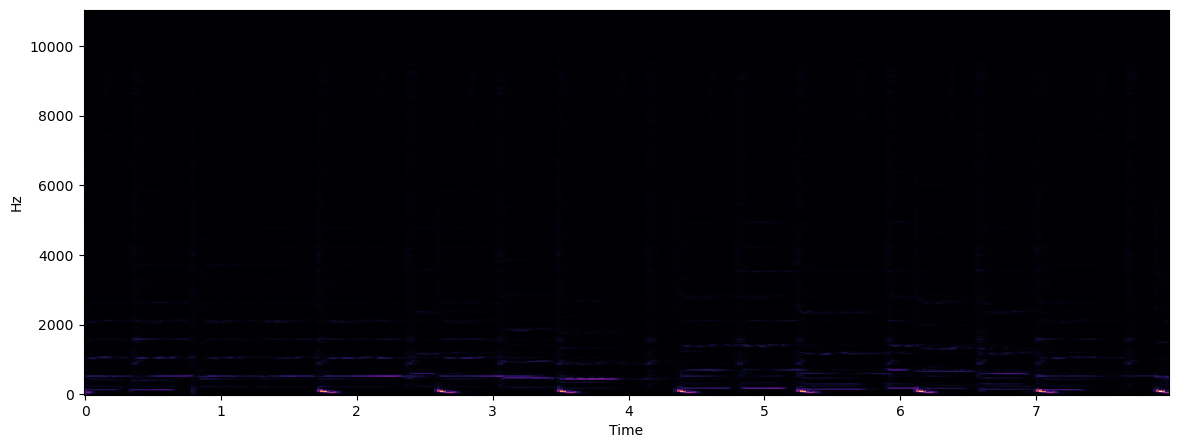

In [31]:
sgram = librosa.stft(samples_noise, n_fft=1024, hop_length=None)
sgram, _ = librosa.magphase(sgram)
plt.figure(figsize=(14,5))
librosa.display.specshow(sgram,sr=sr,x_axis="time",y_axis="hz")

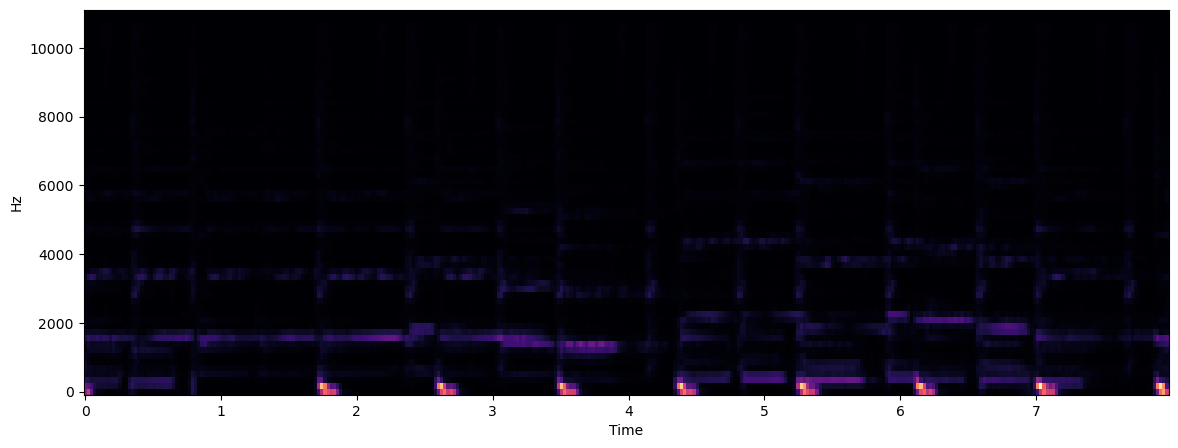

In [32]:
# frecuencia a escala de mel
sgram = librosa.feature.melspectrogram(S=sgram, sr=sr, n_mels=64)
plt.figure(figsize=(14,5))
librosa.display.specshow(sgram, sr=sr, x_axis="time", y_axis="hz")

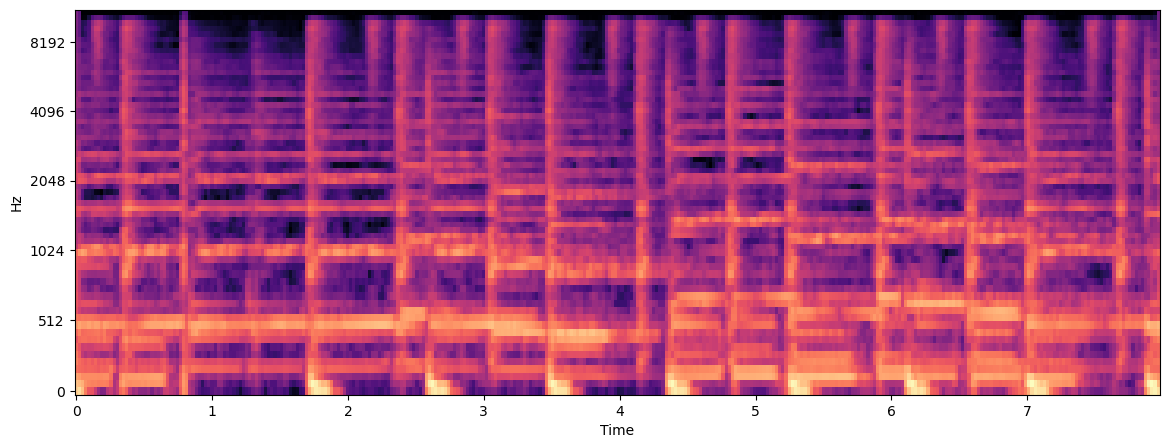

In [33]:
sgram = librosa.amplitude_to_db(sgram, ref=np.min)
plt.figure(figsize=(14,5))
librosa.display.specshow(sgram, sr=sr, x_axis="time", y_axis="mel")